In [34]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, color

from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

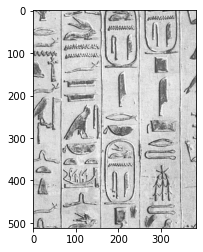

In [23]:
img=io.imread('test/0.jpg')
plt.imshow(img)

In [228]:
detected=pd.read_json('test/image_0_predictions.txt')
coordinates=detected['bbox']

In [132]:
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [166]:
def crop_vertical(image):
    gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges=canny(gray, sigma=3, low_threshold=10, high_threshold=50)
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    h, theta, d = hough_line(edges, theta=tested_angles)
    _, angles, dist=hough_line_peaks(h, theta, d,25)
    dist= np.append(dist,[0,gray.shape[1]])
    sub_images=[]
    dist= sorted(dist)
    for i in range(len(dist)-1):
        sub_images.append(gray[:,int(dist[i]):int(dist[i+1])])
    return sub_images,dist

In [227]:
def move_coord(coordinates,dist):
    new_coordinates=[]
    for d in range(len(dist)-1):
        new_coordinates.append([])

    for cor in coordinates:
        for i in range(len(dist)-1):
            if cor[0] >= dist[i] and cor[0] <= dist[i+1]:
                new_cor = cor.copy()
                new_cor[0]=new_cor[0]-dist[i]
                new_coordinates[i].append(new_cor)
    return new_coordinates

In [157]:
def get_glyphs(gray_image,coordinates):
    glyphs=[]
    for coordinate in coordinates:
        cor=np.asarray(coordinate).astype(int)
        glyph_img=gray_image[cor[1]:cor[1]+cor[3],cor[0]:cor[0]+cor[2]]
        glyphs.append(glyph_img)
    return glyphs

[0.0, 60.547302580140695, 155.6215793588741, 251.69663799843624, 345.7701329163408, 384.0]


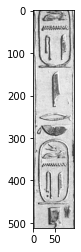

In [207]:
sub_images,dist=crop_vertical(img)
print(dist)
plt.imshow(sub_images[2],cmap='gray')

In [231]:
new_coordinates=move_coord(coordinates,dist)

(32, 77)


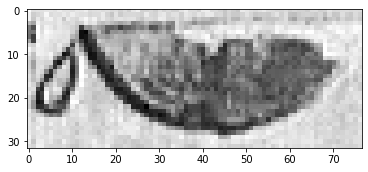

In [271]:
glyphs=get_glyphs(sub_images[2],new_coordinates[2])
print(glyphs[0].shape)
plt.imshow(glyphs[0],cmap='gray')

In [310]:
# create new image of desired size and color (white) for padding
ht, wd= glyphs[0].shape
ww = int(75*2.5) 
hh = int(50*2.5)
color = 210
result = np.full((hh,ww), color, dtype=np.uint8)

# set offsets for top left corner
xx = 0
yy = 0

# copy img image into center of result image
result[yy:yy+ht, xx:xx+wd] = glyphs[0]

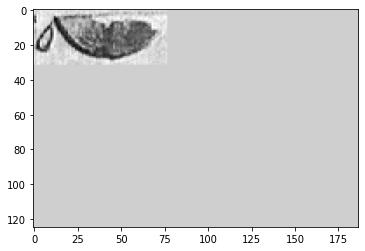

In [311]:
plt.imshow(result,cmap='gray')

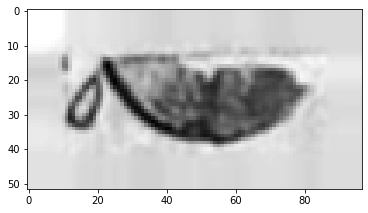

In [340]:
reflect101 = cv2.copyMakeBorder(glyphs[0],10,10,10,10,cv2.BORDER_REPLICATE)
# reflect101=cv2.GaussianBlur(reflect101,(9,9),0)
reflect101=cv2.medianBlur(reflect101,11)
reflect101[10:10+ht, 10:10+wd] = glyphs[0]
reflect101=cv2.GaussianBlur(reflect101,(3,3),0)
plt.imshow(reflect101,cmap='gray')

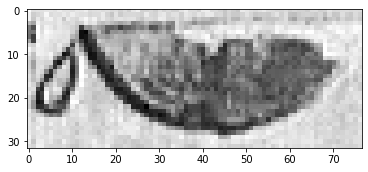

In [316]:
plt.imshow(glyphs[0],cmap='gray')

In [265]:
# glyphs=get_glyphs(gray,coordinates)
# maxw=0
# maxh=0
# for g in glyphs:
#     if g.shape[0]> maxh:
#         maxh= g.shape[0]
#     if g.shape[1]> maxw:
#         maxw= g.shape[1]
# print(maxh,maxw)   

110 93


In [ ]:
X-> 75
110->50